In [1]:
import pandas as pd

In [2]:
import numpy as np

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
df = pd.read_csv('ElectricCarData_Clean.csv')

In [8]:
df

,Brand,Model,AccelSec,TopSpeed_KmH,Range_Km,Efficiency_WhKm,FastCharge_KmH,RapidCharge,PowerTrain,PlugType,BodyStyle,Segment,Seats,PriceEuro
0,Tesla,Model 3 Long Range Dual Motor,4.6,233,450,161,940,Yes,AWD,Type 2 CCS,Sedan,D,5,55480
1,Volkswagen,ID.3 Pure,10.0,160,270,167,250,Yes,RWD,Type 2 CCS,Hatchback,C,5,30000
2,Polestar,2,4.7,210,400,181,620,Yes,AWD,Type 2 CCS,Liftback,D,5,56440
3,BMW,iX3,6.8,180,360,206,560,Yes,RWD,Type 2 CCS,SUV,D,5,68040
4,Honda,e,9.5,145,170,168,190,Yes,RWD,Type 2 CCS,Hatchback,B,4,32997
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98,Nissan,Ariya 63kWh,7.5,160,330,191,440,Yes,FWD,Type 2 CCS,Hatchback,C,5,45000
99,Audi,e-tron S Sportback 55 quattro,4.5,210,335,258,540,Yes,AWD,Type 2 CCS,SUV,E,5,96050
100,Nissan,Ariya e-4ORCE 63kWh,5.9,200,325,194,440,Yes,AWD,Type 2 CCS,Hatchback,C,5,50000
101,Nissan,Ariya e-4ORCE 87kWh Performance,5.1,200,375,232,450,Yes,AWD,Type 2 CCS,Hatchback,C,5,65000


# Checking if Null Values are present 

In [9]:
df.isna().sum()

Brand              0
Model              0
AccelSec           0
TopSpeed_KmH       0
Range_Km           0
Efficiency_WhKm    0
FastCharge_KmH     0
RapidCharge        0
PowerTrain         0
PlugType           0
BodyStyle          0
Segment            0
Seats              0
PriceEuro          0
dtype: int64

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103 entries, 0 to 102
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Brand            103 non-null    object 
 1   Model            103 non-null    object 
 2   AccelSec         103 non-null    float64
 3   TopSpeed_KmH     103 non-null    int64  
 4   Range_Km         103 non-null    int64  
 5   Efficiency_WhKm  103 non-null    int64  
 6   FastCharge_KmH   103 non-null    object 
 7   RapidCharge      103 non-null    object 
 8   PowerTrain       103 non-null    object 
 9   PlugType         103 non-null    object 
 10  BodyStyle        103 non-null    object 
 11  Segment          103 non-null    object 
 12  Seats            103 non-null    int64  
 13  PriceEuro        103 non-null    int64  
dtypes: float64(1), int64(5), object(8)
memory usage: 11.4+ KB


In [11]:
df['PowerTrain'].unique()

array(['AWD', 'RWD', 'FWD'], dtype=object)

In [12]:
df['PlugType'].unique()

array(['Type 2 CCS', 'Type 2 CHAdeMO', 'Type 2', 'Type 1 CHAdeMO'],
      dtype=object)

In [13]:
df['BodyStyle'].unique()

array(['Sedan', 'Hatchback', 'Liftback', 'SUV', 'Pickup', 'MPV', 'Cabrio',
       'SPV', 'Station'], dtype=object)

In [14]:
df['Segment'].unique()

array(['D', 'C', 'B', 'F', 'A', 'E', 'N', 'S'], dtype=object)

In [15]:
df['RapidCharge'].unique()

array(['Yes', 'No'], dtype=object)

In [16]:
df['FastCharge_KmH'].unique()

array(['940', '250', '620', '560', '190', '220', '420', '650', '540',
       '440', '230', '380', '210', '590', '780', '170', '260', '930',
       '850', '910', '490', '470', '270', '450', '350', '710', '240',
       '390', '570', '610', '340', '730', '920', '-', '550', '900', '520',
       '430', '890', '410', '770', '460', '360', '810', '480', '290',
       '330', '740', '510', '320', '500'], dtype=object)

# There were hypen present in FastCharge_KmH so we replaced it with mean of the attribute


In [17]:
df['FastCharge_KmH']=df['FastCharge_KmH'].str.replace('-','0')

In [18]:
df['FastCharge_KmH']=df['FastCharge_KmH'].astype(float)

In [19]:
df['FastCharge_KmH'].mean()

434.56310679611653

In [20]:
df['FastCharge_KmH']=df['FastCharge_KmH'].replace(0, 434.56)

In [21]:
df['FastCharge_KmH'].unique()

array([940.  , 250.  , 620.  , 560.  , 190.  , 220.  , 420.  , 650.  ,
       540.  , 440.  , 230.  , 380.  , 210.  , 590.  , 780.  , 170.  ,
       260.  , 930.  , 850.  , 910.  , 490.  , 470.  , 270.  , 450.  ,
       350.  , 710.  , 240.  , 390.  , 570.  , 610.  , 340.  , 730.  ,
       920.  , 434.56, 550.  , 900.  , 520.  , 430.  , 890.  , 410.  ,
       770.  , 460.  , 360.  , 810.  , 480.  , 290.  , 330.  , 740.  ,
       510.  , 320.  , 500.  ])

# # # Droping Brand and Model name of Company Because we don't need these features for our analysis

In [22]:
df=df.drop(['Brand','Model'],axis=1)

In [23]:
df

,AccelSec,TopSpeed_KmH,Range_Km,Efficiency_WhKm,FastCharge_KmH,RapidCharge,PowerTrain,PlugType,BodyStyle,Segment,Seats,PriceEuro
0,4.6,233,450,161,940.0,Yes,AWD,Type 2 CCS,Sedan,D,5,55480
1,10.0,160,270,167,250.0,Yes,RWD,Type 2 CCS,Hatchback,C,5,30000
2,4.7,210,400,181,620.0,Yes,AWD,Type 2 CCS,Liftback,D,5,56440
3,6.8,180,360,206,560.0,Yes,RWD,Type 2 CCS,SUV,D,5,68040
4,9.5,145,170,168,190.0,Yes,RWD,Type 2 CCS,Hatchback,B,4,32997
...,...,...,...,...,...,...,...,...,...,...,...,...
98,7.5,160,330,191,440.0,Yes,FWD,Type 2 CCS,Hatchback,C,5,45000
99,4.5,210,335,258,540.0,Yes,AWD,Type 2 CCS,SUV,E,5,96050
100,5.9,200,325,194,440.0,Yes,AWD,Type 2 CCS,Hatchback,C,5,50000
101,5.1,200,375,232,450.0,Yes,AWD,Type 2 CCS,Hatchback,C,5,65000


# EDA

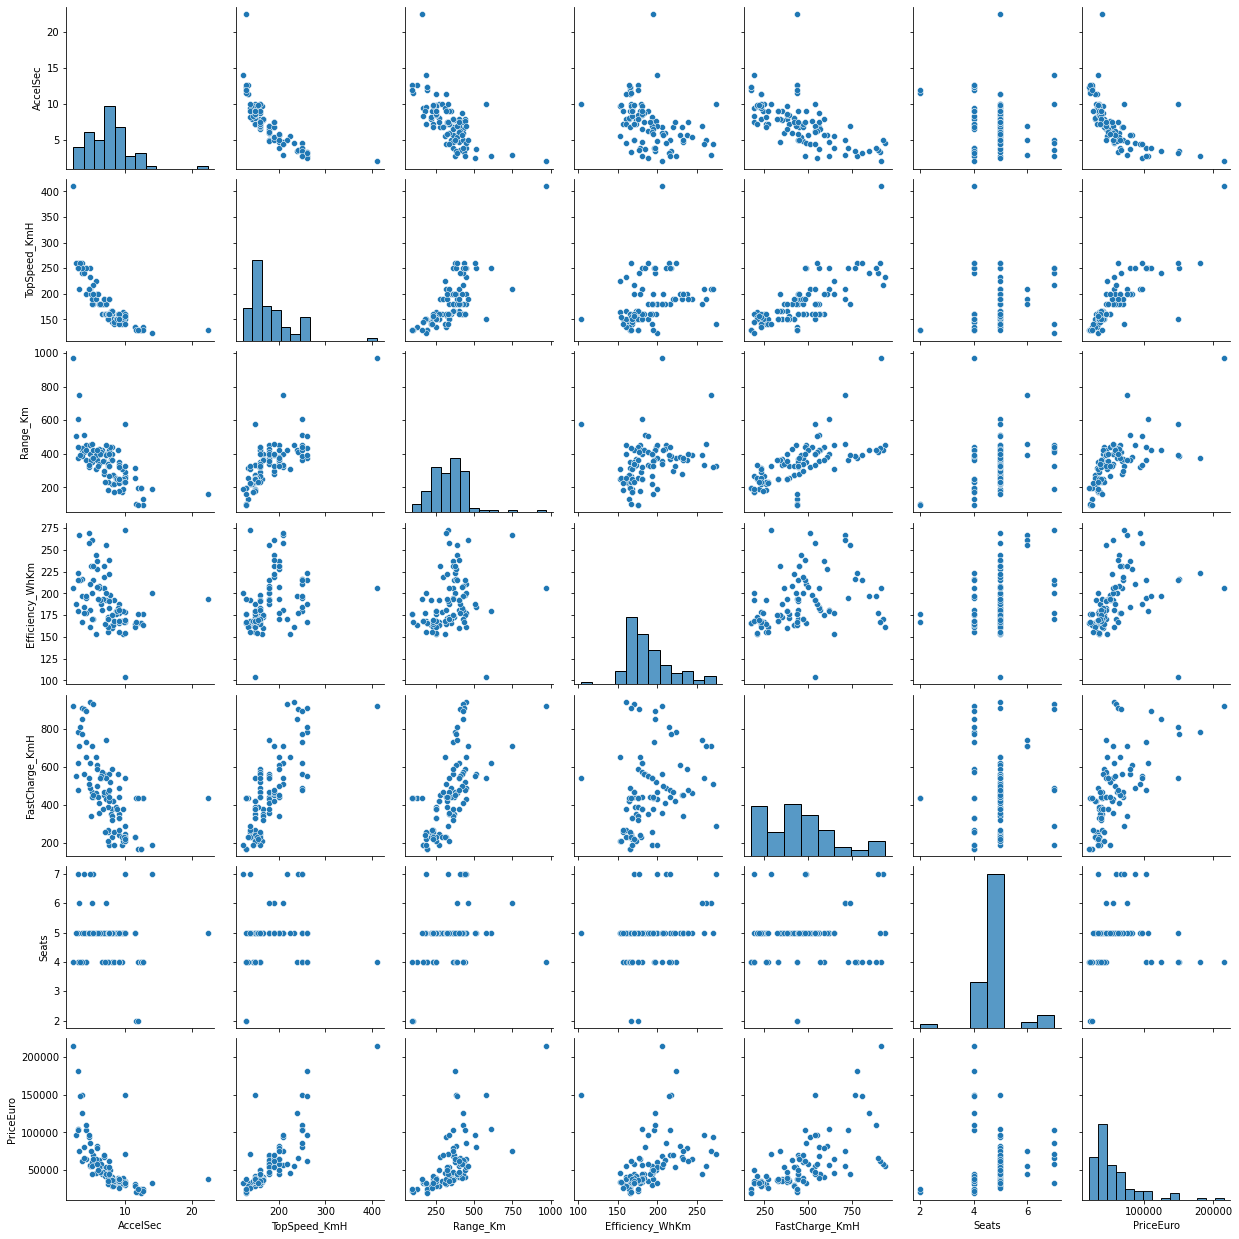

In [24]:
#Create a distribution plot for rating
sns.pairplot(df)
plt.show()

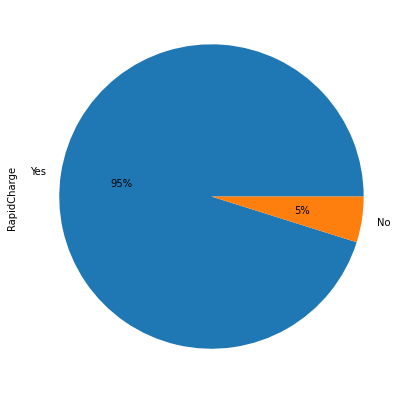

In [25]:
#Plotting a pie chart
plt.figure(figsize=[9,7])
df['RapidCharge'].value_counts().plot.pie(autopct='%.0f%%')
plt.show()

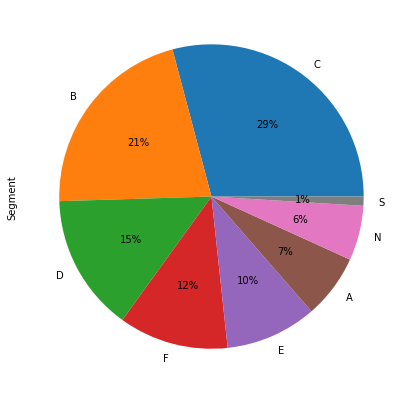

In [26]:
#Plotting a pie chart
plt.figure(figsize=[9,7])
df['Segment'].value_counts().plot.pie(autopct='%.0f%%')
plt.show()

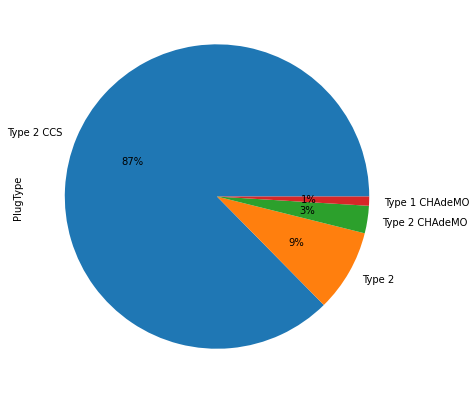

In [27]:
#Plotting a pie chart
plt.figure(figsize=[9,7])
df['PlugType'].value_counts().plot.pie(autopct='%.0f%%')
plt.show()

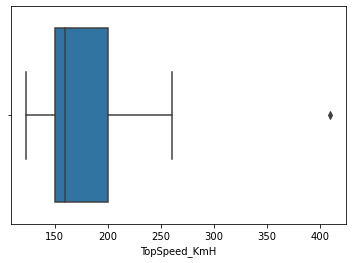

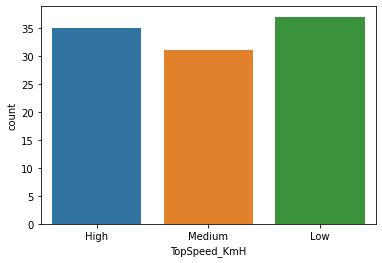

In [28]:
sns.boxplot(x=df['TopSpeed_KmH'])
plt.show()
def convert(x):
     if x<160:
       return "Low"
     elif x>=160 and x<190:
       return "Medium"
     else:
       return "High"
converted_TopSpeed=df['TopSpeed_KmH'].apply(convert)
sns.countplot(x=converted_TopSpeed)
plt.show()

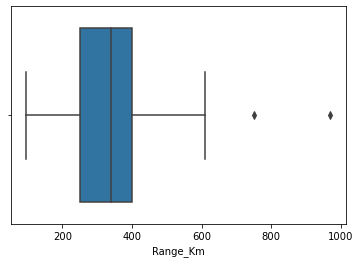

D:\Annaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


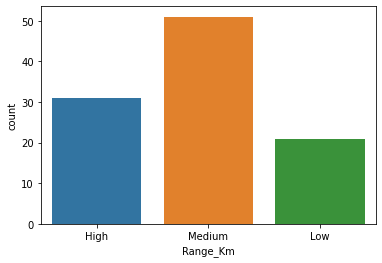

In [29]:
sns.boxplot(x=df['Range_Km'])
plt.show()
def convert1(x):
     if x<250:
       return "Low"
     elif x>=250 and x<400:
       return "Medium"
     else:
       return "High"
converted_Range=df['Range_Km'].apply(convert1)
sns.countplot(converted_Range)
plt.show()

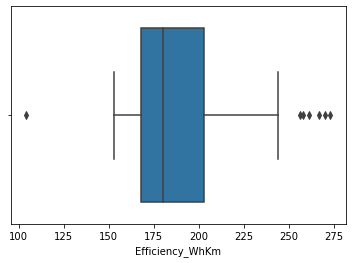

D:\Annaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


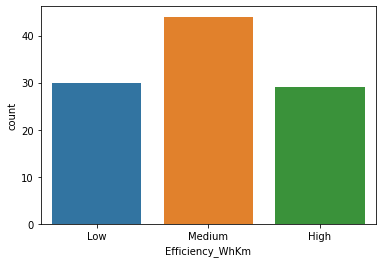

In [30]:
sns.boxplot(x=df['Efficiency_WhKm'])
plt.show()
def convert2(x):
     if x<170:
       return "Low"
     elif x>=170 and x<200:
       return "Medium"
     else:
       return "High"
converted_Eff=df['Efficiency_WhKm'].apply(convert2)
sns.countplot(converted_Eff)
plt.show()

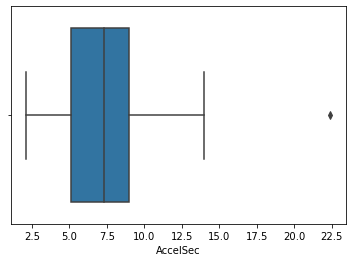

D:\Annaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


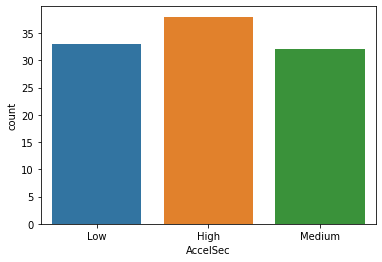

In [31]:
sns.boxplot(x=df['AccelSec'])
plt.show()
def convert3(x):
     if x<6:
       return "Low"
     elif x>=6 and x<8:
       return "Medium"
     else:
       return "High"
converted_Acc=df['AccelSec'].apply(convert3)
sns.countplot(converted_Acc)
plt.show()

In [32]:
df['PlugType'].value_counts()

Type 2 CCS        90
Type 2             9
Type 2 CHAdeMO     3
Type 1 CHAdeMO     1
Name: PlugType, dtype: int64

In [33]:
df['RapidCharge'].value_counts()

Yes    98
No      5
Name: RapidCharge, dtype: int64

# Since PlugType and RapidCharge are imbalanced attributes we drop these attributes

In [34]:
from sklearn.preprocessing import OrdinalEncoder

In [35]:

oe2=OrdinalEncoder(categories=[['AWD', 'RWD', 'FWD']])
oe4=OrdinalEncoder(categories=[['Sedan', 'Hatchback', 'Liftback', 'SUV', 'Pickup', 'MPV', 'Cabrio','SPV', 'Station']])
oe5=OrdinalEncoder(categories=[['D', 'C', 'B', 'F', 'A', 'E', 'N', 'S']])

In [36]:

#df['PowerTrain']=oe2.fit_transform(df[['PowerTrain']])
#df['BodyStyle']=oe4.fit_transform(df[['BodyStyle']])
#df['Segment']=oe5.fit_transform(df[['Segment']])

In [37]:
df = df.drop(columns=['RapidCharge','PlugType'])

In [38]:
df = pd.get_dummies(df)
df

,AccelSec,TopSpeed_KmH,Range_Km,Efficiency_WhKm,FastCharge_KmH,Seats,PriceEuro,PowerTrain_AWD,PowerTrain_FWD,PowerTrain_RWD,...,BodyStyle_Sedan,BodyStyle_Station,Segment_A,Segment_B,Segment_C,Segment_D,Segment_E,Segment_F,Segment_N,Segment_S
0,4.6,233,450,161,940.0,5,55480,1,0,0,...,1,0,0,0,0,1,0,0,0,0
1,10.0,160,270,167,250.0,5,30000,0,0,1,...,0,0,0,0,1,0,0,0,0,0
2,4.7,210,400,181,620.0,5,56440,1,0,0,...,0,0,0,0,0,1,0,0,0,0
3,6.8,180,360,206,560.0,5,68040,0,0,1,...,0,0,0,0,0,1,0,0,0,0
4,9.5,145,170,168,190.0,4,32997,0,0,1,...,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98,7.5,160,330,191,440.0,5,45000,0,1,0,...,0,0,0,0,1,0,0,0,0,0
99,4.5,210,335,258,540.0,5,96050,1,0,0,...,0,0,0,0,0,0,1,0,0,0
100,5.9,200,325,194,440.0,5,50000,1,0,0,...,0,0,0,0,1,0,0,0,0,0
101,5.1,200,375,232,450.0,5,65000,1,0,0,...,0,0,0,0,1,0,0,0,0,0


In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103 entries, 0 to 102
Data columns (total 27 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   AccelSec             103 non-null    float64
 1   TopSpeed_KmH         103 non-null    int64  
 2   Range_Km             103 non-null    int64  
 3   Efficiency_WhKm      103 non-null    int64  
 4   FastCharge_KmH       103 non-null    float64
 5   Seats                103 non-null    int64  
 6   PriceEuro            103 non-null    int64  
 7   PowerTrain_AWD       103 non-null    uint8  
 8   PowerTrain_FWD       103 non-null    uint8  
 9   PowerTrain_RWD       103 non-null    uint8  
 10  BodyStyle_Cabrio     103 non-null    uint8  
 11  BodyStyle_Hatchback  103 non-null    uint8  
 12  BodyStyle_Liftback   103 non-null    uint8  
 13  BodyStyle_MPV        103 non-null    uint8  
 14  BodyStyle_Pickup     103 non-null    uint8  
 15  BodyStyle_SPV        103 non-null    uin

In [40]:
df

,AccelSec,TopSpeed_KmH,Range_Km,Efficiency_WhKm,FastCharge_KmH,Seats,PriceEuro,PowerTrain_AWD,PowerTrain_FWD,PowerTrain_RWD,...,BodyStyle_Sedan,BodyStyle_Station,Segment_A,Segment_B,Segment_C,Segment_D,Segment_E,Segment_F,Segment_N,Segment_S
0,4.6,233,450,161,940.0,5,55480,1,0,0,...,1,0,0,0,0,1,0,0,0,0
1,10.0,160,270,167,250.0,5,30000,0,0,1,...,0,0,0,0,1,0,0,0,0,0
2,4.7,210,400,181,620.0,5,56440,1,0,0,...,0,0,0,0,0,1,0,0,0,0
3,6.8,180,360,206,560.0,5,68040,0,0,1,...,0,0,0,0,0,1,0,0,0,0
4,9.5,145,170,168,190.0,4,32997,0,0,1,...,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98,7.5,160,330,191,440.0,5,45000,0,1,0,...,0,0,0,0,1,0,0,0,0,0
99,4.5,210,335,258,540.0,5,96050,1,0,0,...,0,0,0,0,0,0,1,0,0,0
100,5.9,200,325,194,440.0,5,50000,1,0,0,...,0,0,0,0,1,0,0,0,0,0
101,5.1,200,375,232,450.0,5,65000,1,0,0,...,0,0,0,0,1,0,0,0,0,0


In [41]:
df=df.astype(float)

In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103 entries, 0 to 102
Data columns (total 27 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   AccelSec             103 non-null    float64
 1   TopSpeed_KmH         103 non-null    float64
 2   Range_Km             103 non-null    float64
 3   Efficiency_WhKm      103 non-null    float64
 4   FastCharge_KmH       103 non-null    float64
 5   Seats                103 non-null    float64
 6   PriceEuro            103 non-null    float64
 7   PowerTrain_AWD       103 non-null    float64
 8   PowerTrain_FWD       103 non-null    float64
 9   PowerTrain_RWD       103 non-null    float64
 10  BodyStyle_Cabrio     103 non-null    float64
 11  BodyStyle_Hatchback  103 non-null    float64
 12  BodyStyle_Liftback   103 non-null    float64
 13  BodyStyle_MPV        103 non-null    float64
 14  BodyStyle_Pickup     103 non-null    float64
 15  BodyStyle_SPV        103 non-null    flo

In [43]:
cols_to_norm = ['AccelSec','TopSpeed_KmH','Range_Km','Efficiency_WhKm','FastCharge_KmH','PriceEuro']
df_prev=df.copy()
df[cols_to_norm] = df[cols_to_norm].apply(lambda x: (x - x.min()) / (x.max() - x.min()))

In [44]:
df

,AccelSec,TopSpeed_KmH,Range_Km,Efficiency_WhKm,FastCharge_KmH,Seats,PriceEuro,PowerTrain_AWD,PowerTrain_FWD,PowerTrain_RWD,...,BodyStyle_Sedan,BodyStyle_Station,Segment_A,Segment_B,Segment_C,Segment_D,Segment_E,Segment_F,Segment_N,Segment_S
0,0.123153,0.383275,0.405714,0.337278,1.000000,5.0,0.181407,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,0.389163,0.128920,0.200000,0.372781,0.103896,5.0,0.050654,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,0.128079,0.303136,0.348571,0.455621,0.584416,5.0,0.186334,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,0.231527,0.198606,0.302857,0.603550,0.506494,5.0,0.245860,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,0.364532,0.076655,0.085714,0.378698,0.025974,4.0,0.066033,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98,0.266010,0.128920,0.268571,0.514793,0.350649,5.0,0.127628,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
99,0.118227,0.303136,0.274286,0.911243,0.480519,5.0,0.389596,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
100,0.187192,0.268293,0.262857,0.532544,0.350649,5.0,0.153286,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
101,0.147783,0.268293,0.320000,0.757396,0.363636,5.0,0.230260,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [45]:
from sklearn.cluster import KMeans

D:\Annaconda\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Text(0, 0.5, 'WCSS')

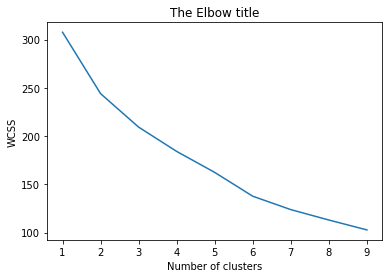

In [46]:
wcss=[]
for i in range(1,10):
    kmeans = KMeans(i)
    kmeans.fit(df)
    wcss_iter = kmeans.inertia_
    wcss.append(wcss_iter)

number_clusters = range(1,10)
plt.plot(number_clusters,wcss)
plt.title('The Elbow title')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')

In [47]:
kmeanModel = KMeans(n_clusters=5)
kmeanModel.fit(df)

KMeans(n_clusters=5)

In [48]:
identified_clusters = kmeanModel.fit_predict(df)
identified_clusters

array([4, 2, 4, 1, 0, 4, 2, 3, 4, 1, 1, 2, 3, 4, 2, 0, 4, 0, 3, 0, 3, 1,
       2, 4, 4, 2, 2, 1, 0, 3, 1, 2, 3, 1, 2, 2, 2, 0, 3, 1, 4, 3, 1, 0,
       0, 3, 3, 4, 4, 2, 1, 4, 3, 2, 1, 0, 3, 0, 2, 4, 3, 1, 2, 1, 1, 4,
       3, 1, 3, 1, 0, 1, 4, 1, 2, 2, 1, 0, 1, 4, 2, 1, 0, 1, 3, 0, 1, 1,
       1, 2, 1, 0, 3, 2, 3, 2, 3, 1, 2, 1, 2, 2, 1])

In [49]:
data_with_clusters = df_prev.copy()
data_with_clusters['Clusters'] = identified_clusters 

In [50]:
data_with_clusters

,AccelSec,TopSpeed_KmH,Range_Km,Efficiency_WhKm,FastCharge_KmH,Seats,PriceEuro,PowerTrain_AWD,PowerTrain_FWD,PowerTrain_RWD,...,BodyStyle_Station,Segment_A,Segment_B,Segment_C,Segment_D,Segment_E,Segment_F,Segment_N,Segment_S,Clusters
0,4.6,233.0,450.0,161.0,940.0,5.0,55480.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,4
1,10.0,160.0,270.0,167.0,250.0,5.0,30000.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,2
2,4.7,210.0,400.0,181.0,620.0,5.0,56440.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,4
3,6.8,180.0,360.0,206.0,560.0,5.0,68040.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1
4,9.5,145.0,170.0,168.0,190.0,4.0,32997.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98,7.5,160.0,330.0,191.0,440.0,5.0,45000.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,2
99,4.5,210.0,335.0,258.0,540.0,5.0,96050.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1
100,5.9,200.0,325.0,194.0,440.0,5.0,50000.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,2
101,5.1,200.0,375.0,232.0,450.0,5.0,65000.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,2


In [51]:
data_with_clusters['Clusters'].value_counts()

1    29
2    24
3    19
4    16
0    15
Name: Clusters, dtype: int64

In [52]:
Segment_wise_mean=data_with_clusters[['AccelSec','TopSpeed_KmH','Range_Km','Efficiency_WhKm','FastCharge_KmH','PriceEuro','Clusters','Seats']].groupby('Clusters').mean()

In [53]:
Segment_wise_mean

,AccelSec,TopSpeed_KmH,Range_Km,Efficiency_WhKm,FastCharge_KmH,PriceEuro,Seats
Clusters,,,,,,,
0,9.866667,142.333333,207.333333,168.200000,327.216000,30655.600000,3.733333
1,5.644828,195.448276,393.965517,217.482759,534.137931,65418.965517,5.379310
2,8.208333,162.000000,312.083333,179.791667,370.000000,39670.833333,5.000000
3,9.926316,147.684211,278.157895,178.578947,308.661053,36443.052632,5.157895
4,4.031250,247.500000,474.062500,184.125000,736.875000,109193.062500,4.562500


In [54]:
data_with_clusters[['AccelSec','TopSpeed_KmH','Range_Km','Efficiency_WhKm','FastCharge_KmH','PriceEuro','Clusters','Seats']].groupby('Clusters').min()

,AccelSec,TopSpeed_KmH,Range_Km,Efficiency_WhKm,FastCharge_KmH,PriceEuro,Seats
Clusters,,,,,,,
0,6.5,130.0,95.0,156.0,170.0,20129.0,2.0
1,2.8,160.0,280.0,171.0,340.0,45000.0,5.0
2,5.1,140.0,180.0,153.0,190.0,25500.0,5.0
3,7.3,123.0,160.0,154.0,190.0,29146.0,4.0
4,2.1,150.0,310.0,104.0,540.0,46380.0,4.0


In [55]:
data_with_clusters[['AccelSec','TopSpeed_KmH','Range_Km','Efficiency_WhKm','FastCharge_KmH','PriceEuro','Clusters','Seats']].groupby('Clusters').max()

,AccelSec,TopSpeed_KmH,Range_Km,Efficiency_WhKm,FastCharge_KmH,PriceEuro,Seats
Clusters,,,,,,,
0,12.7,160.0,440.0,181.0,590.00,45000.0,4.0
1,7.5,250.0,750.0,270.0,930.00,102990.0,7.0
2,10.0,200.0,440.0,232.0,560.00,65000.0,5.0
3,22.4,167.0,400.0,273.0,434.56,70631.0,7.0
4,10.0,410.0,970.0,223.0,940.00,215000.0,5.0


In [56]:
Segment_wise_sum=data_with_clusters.drop(columns=['AccelSec','TopSpeed_KmH','Range_Km','Efficiency_WhKm','FastCharge_KmH','PriceEuro'],axis=1).groupby('Clusters').sum()

In [57]:
Segment_wise_sum

,Seats,PowerTrain_AWD,PowerTrain_FWD,PowerTrain_RWD,BodyStyle_Cabrio,BodyStyle_Hatchback,BodyStyle_Liftback,BodyStyle_MPV,BodyStyle_Pickup,BodyStyle_SPV,...,BodyStyle_Sedan,BodyStyle_Station,Segment_A,Segment_B,Segment_C,Segment_D,Segment_E,Segment_F,Segment_N,Segment_S
Clusters,,,,,,,,,,,,,,,,,,,,,
0,56.0,0.0,5.0,10.0,1.0,14.0,0.0,0.0,0.0,0.0,...,0.0,0.0,7.0,6.0,2.0,0.0,0.0,0.0,0.0,0.0
1,156.0,24.0,0.0,5.0,0.0,0.0,0.0,0.0,3.0,0.0,...,0.0,0.0,0.0,0.0,4.0,10.0,10.0,2.0,3.0,0.0
2,120.0,3.0,13.0,8.0,0.0,13.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,24.0,0.0,0.0,0.0,0.0,0.0
3,98.0,0.0,19.0,0.0,1.0,5.0,0.0,1.0,0.0,3.0,...,0.0,0.0,0.0,16.0,0.0,0.0,0.0,0.0,3.0,0.0
4,73.0,14.0,0.0,2.0,1.0,0.0,4.0,0.0,0.0,0.0,...,10.0,1.0,0.0,0.0,0.0,5.0,0.0,10.0,0.0,1.0
